Our learning thus far has dealt mainly with the extraction of data from databases. It's about time that we learn to create and update databases.

Rather than working with a **SQL editor**, we'll be using the **SQLite shell** in the command line, a text interface through which we can interact with our computer. Most of us are used to interacting with our computers with a mouse and graphical user interface (GUI), but we can recreate many of these interactions purely by typing!

The **SQLite shell** is useful because it allows us to connect to our database files without having to go through another language like `R`. From the shell, we can run any command we want and quickly perform the actions we need.

We'll continue working with the Chinook music store database in the file `chinook.db`. To launch the SQLite shell, we use the `sqlite3` command followed by the name of the database file as an argument.

`sqlite3 chinook.db`

When we launch the SQLite shell, we will see the SQLite prompt.

Once we're connected to `chinook.db`, we can start interacting with it. If we write `SELECT` as our first line and press enter, the SQLite prompt will change to `...>`, indicating that we can finish our query.

Including a semicolon (`;`) is necessary in the SQLite shell. If we don't use it, the shell will not know if we are finished writing our query.

SQLite has a number of **dot** commands which we can use to help us work with databases.

One that we'll want to use often is `.headers on`, which switches column headers **on**.

The next thing is that it's hard to read down the columns, since they don't line up. There's another dot command, `.mode`, that will help us out here. The `.mode` dot command allows us to select from a few different display modes. We'll use `.mode column` to allow for easier to read outputs. 

There are several other dot commands we'll use often:

* `.help` - Displays help text showing all dot commands and their function.
* `.tables` - Displays a list of all tables and views in the current database.
* `.shell [command]` - Run a command like `ls` or `clear` in the system shell. For example `.shell clear`
* `.quit` - Quits the SQLite shell.

# CREATE TABLE:

`CREATE TABLE [table_name] (
    [column1_name] [column1_type],
    [column2_name] [column2_type],
    [column3_name] [column3_type],
    [...]
);`

Each column in SQLite must have a type. While some database systems have as many as 50 distinct data types, SQLite uses only 5 behind the scenes:

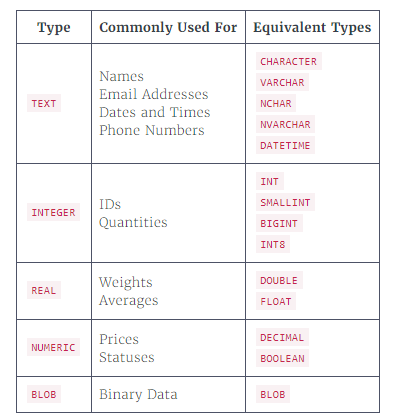

Just like with `views`, if we try to create a table that already exists we will get an error. If we make a mistake when we create a table, we can use`DROP` statement to remove the table so we can create it again:

`DROP TABLE [table_name];`

We can also use the SQLite dot command `.schema [table_name]` to view the schema for a table we have just created to check where we might have gone wrong.

# Primary key

Each table has one or more columns shaded in yellow, which indicates they are the **primary key**. A primary key is a unique identifier for each row - We cannot have two rows in a table with the same value for the primary key column(s).

When two tables have a relation, there will be a column in one table that is a primary key in another table. This is known as a **foreign key**. By defining a foreign key, our database engine will prevent us from adding rows where the foreign key value doesn't exist in the other table, which helps to prevent errors in our data (note that by default SQLite doesn't force foreign key constraints)

Usually, a primary key is specified as part of a `create` statement. Once the primary key is defined, the database engine will prevent any new rows from being added to the database if they have the same primary key as any existing rows.

`CREATE TABLE user (
    user_id INTEGER PRIMARY KEY,
    first_name TEXT,
    last_name TEXT
);`

`CREATE TABLE purchase (
    purchase_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    purchase_date TEXT,
    total NUMERIC,
    FOREIGN KEY (user_id) REFERENCES user(user_id)
);`

By adding a `FOREIGN KEY` clause, we can define one of our columns as a `foreign key` and specify the **table** and **column** that it references

# Database normalization.

The process of optimizing the design of databases to **minimize data duplication and integrity** issues is called **database normalization**. In database normalization theory, there are several different phases of normalization, known as [normal forms](http://www.bkent.net/Doc/simple5.htm). Knowing each normal form is not as important as understanding the goals of normalization, and designing our databases to avoid data duplication and integrity issues.

When two or more columns combine to form a primary key it is called a **compound primary key**.

To create a table with multiple **foreign keys**, we simply use multiple `FOREIGN KEY` clauses.

# Add rows to Data

 To add rows to a SQL table, we'll use the `INSERT` statement:

`INSERT INTO [table_name] (
    [column1_name],
    [column2_name],
    [column3_name]
) VALUES (
    [value1],
    [value2],
    [value3]
);`

If we are inserting values into every column in a table, we don't need to list the column names:

`INSERT INTO [table_name] 
VALUES ([value11], [value12], [value13]), 
       ([value21], [value22], [value23]);`

Because of our foreign key constraints, we'll need to start by adding rows to the **wishlist table**, and then add rows to the **wishlist_track table**. If we don't, our `insert` statement will fail.

If we make an error while inserting new rows, we'll need to use the `DELETE` statement to remove all rows:

`DELETE FROM [table_name]`

Or use it with a `where` statement to remove selected rows:

`DELETE FROM [table_name]
WHERE [expression];`

`INSERT INTO wishlist
VALUES
(1, 34, "Joao's awesome wishlist"),
(2, 18, "Amy loves pop");`

`INSERT INTO wishlist_track
VALUES
(1, 1158),
(1, 2646),
(1, 1990),
(2, 3272),
(2, 3470);`


### Add Columns

If we need to add a column to each of our tables. We can use the `ALTER` statement to do this.

`ALTER TABLE [table_name]
ADD COLUMN [column_name] [column_type];` # can not add multiple columns at once

SQLite supports only five basic types - the closest thing to a boolean type is `NUMERIC`, where the values 1 and 0 will represent `true` and `false` respectively

`ALTER TABLE wishlist ADD COLUMN active NUMERIC;`

`ALTER TABLE wishlist_track ADD COLUMN active NUMERIC;`

### Update Values

To change values for existing rows, we use the `UPDATE` statement:

`UPDATE [table_name]
SET [column_name] = [expression]
WHERE [expression]`

The `WHERE` clause is optional, and can contain any expression that would be valid in a `SELECT` statement.


There are several variations we can use for our `SET` clause. First we can use a single value:

`UPDATE customer
SET phone = "+55 (12) 3921-4464"
WHERE customer_id = 1`

We can use a subquery that returns a single value:

`UPDATE track
SET unit_price = (
                    SELECT AVG(unit_price)
                    FROM track
                 )`

We can use a column, or function on an existing column:

`UPDATE track
SET unit_price = unit_price * 1.1`

Lastly, we can set more than one column at once:

`UPDATE wishlist_track
SET
    active = 1,
    purchased = 0;`

`UPDATE wishlist SET active = 1;`

`UPDATE wishlist_track SET active = 1;`


**Task**

Let's put everything into action with a challenge. Up until now, the Chinook store hasn't had to collect sales tax, but due to some new tax legislation, we will need to charge customers in certain countries taxes on their purchases.

We need to add the following columns to the `invoice` table:

* subtotal
* tax

We also need to update all existing invoices with data for these two new columns. The value for the `tax` column will need to be `0` for every row, and the value for the subtotal column will need to be the same as the total column for each row.

**Answer**

`ALTER TABLE invoice ADD COLUMN tax NUMERIC; `

`ALTER TABLE invoice ADD COLUMN subtotal NUMERIC;`

`UPDATE invoice SET tax = 0, subtotal = total;`

`.quit`
`